Ovaj primer demonstrira koriscenje Keras biblioteke u zadacima regresije. Na osnovu skupa podataka koji sadrzi informacije o nekretninama, potrebno je predvideti cenu nekretnine.

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.datasets import boston_housing

Using TensorFlow backend.


In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
from sklearn import preprocessing

In [4]:
np.random.seed(42)

Ucitavamo skup podataka i vrsimo pripremne korake. 

In [5]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data(test_split = 0.33)

In [6]:
x_train.shape

(339, 13)

In [7]:
x_test.shape

(167, 13)

In [8]:
y_train.shape

(339,)

In [9]:
number_of_features = x_train.shape[1]
output_size = 1

In [10]:
scaler = preprocessing.StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

Pravimo mrezu sa propagacijom unapred. 
<br>
Mreza ce imati ulazni sloj, jedan skriveni sloj sa 100 neurona i izlazni sloj.  
<br>
Broj neurona ulaznog sloja odgovara broju atributa skupa podataka (13). 
<br>
Broj neurona izlaznog sloja je 1. 

In [11]:
model = Sequential()
model.add(Dense(units = 100, input_dim = number_of_features, activation = 'relu'))
model.add(Dense(units = output_size))

In [38]:
model.compile(optimizer='adam', loss='mse')

In [13]:
# pregled mreze i broja parametara koji je karakterisu se moze dobiti sa summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               1400      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 1,501
Trainable params: 1,501
Non-trainable params: 0
_________________________________________________________________


In [31]:
epochs = 1000
batch_size = 32
verbose = 0

In [32]:
# treniranje mreze
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)

### Analiza modela

In [33]:
epochs = history.epoch

In [34]:
loss = history.history['loss']

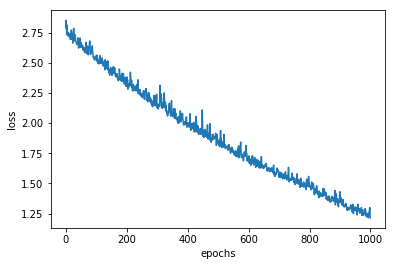

In [35]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(epochs, loss)

Ugradjena Keras funkcija za evaluaciju,
rezultat je vrednost funkcije gubitka (mse)

In [36]:
model.evaluate(x_test, y_test)

167/167 [==============================] - 0s 60us/step


9.050000070811747

In [20]:
from sklearn import metrics

In [21]:
y_pred = model.predict(x_test)

In [22]:
metrics.r2_score(y_pred, y_test)

0.88329807146454

Ugradjena Keras funkcija za predikciju vrednosti.

In [45]:
x_new = np.random.uniform(0, 1, number_of_features).reshape(1, number_of_features)
print('x_new:', x_new)
print(model.predict(x_new))
print(model.predict(x_new, batch_size=1))

x_new: [[0.24888538 0.86641387 0.49787787 0.92027859 0.26390174 0.58333005
  0.05084484 0.85800665 0.11349616 0.0085311  0.71840912 0.64125822
  0.52207318]]
[[6.203115]]
[[6.203115]]


## Cuvanje i ucitavanje modela

Tezine koje karakterisu mrezu se mogu posebno analizirati. Za svaki sloj mreze postoji matrica koeficijenata, kao i matrica slobodnih clanova. Sve ove matrice se cuvaju u listi *weights* modela.

In [24]:
weights = model.weights

In [52]:
print(len(weights))
print(type(weights))

4
<class 'list'>


In [54]:
for w in weights:
    print(w.shape)

(13, 100)
(100,)
(100, 1)
(1,)


In [59]:
# Slicno:
for w in model.get_weights():
    print(w.shape)

(13, 100)
(100,)
(100, 1)
(1,)


Izracunate tezine je moguce sacuvati i kasnije upotrebiti. 

In [27]:
model.save_weights('boston_housing_weights.hdf5')

Ceo model, ukljucujuci i konfiguraciju i matrice tezina, se moze sacuvati.
Model se moze sacuvati koristeci `model.save(filepath)`. Kreira se datoteka tipa *HDF5* koja sadrzi:
- Arhitekturu modela
- Tezine modela
- Konfiguraciju obucavanja (gubitak, optimizacioni algoritam...)
- Stanje optimizacionog algoritma (omogucava se nastavak obucavanja...)

Nakon sto je model sacuvan, moze se ucitati koristeci `keras.models.load_model(filepath)`
kako bi se ponovo instancirao. Funkcija ce pozvati i `compile` koristeci konfiguraciju za obucavanje (osim ukoliko model originalno nije bio kompiliran).

Kako instalirati HDF5 za slucaj da nije instaliran na Vasem racunaru? [keras docs](https://keras.io/getting-started/faq/#how-can-i-install-hdf5-or-h5py-to-save-my-models-in-keras)

In [60]:
model.save('boston_housing.hdf5')

Cuvanje arhitekture modela preko JSON formata.

In [55]:
# save as JSON
json_string = model.to_json()
print(json_string)

{"class_name": "Sequential", "config": [{"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "batch_input_shape": [null, 13], "dtype": "float32", "units": 100, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_2", "trainable": true, "units": 1, "activation": "linear", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, 

In [62]:
# Cuvanje arhitekture modela bez tezina
target = 'boston_housing_arch.json'
try:
    with open(target, 'w') as fp:
        fp.write(model.to_json())
        print("Succesfully saved arch!")
except IOError:
    print("Failed writing to {}".format(target))


Succesfully saved arch!


Konfiguracija samog modela, se, takodje, moze procitati, sacuvati i po potrebi, ucitati.

```python
config = model.get_config()
model = Model.from_config(config)
# or, for Sequential:
model = Sequential.from_config(config)
```

U starijim verzijama keras-a postojao je bag usled kojeg je `get_config()` vracao listu umesto recnik, bag je popravljen: [github](https://github.com/keras-team/keras/issues/11179).

In [28]:
model.get_config()

[{'class_name': 'Dense',
  'config': {'name': 'dense_1',
   'trainable': True,
   'batch_input_shape': (None, 13),
   'dtype': 'float32',
   'units': 100,
   'activation': 'relu',
   'use_bias': True,
   'kernel_initializer': {'class_name': 'VarianceScaling',
    'config': {'scale': 1.0,
     'mode': 'fan_avg',
     'distribution': 'uniform',
     'seed': None}},
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'kernel_regularizer': None,
   'bias_regularizer': None,
   'activity_regularizer': None,
   'kernel_constraint': None,
   'bias_constraint': None}},
 {'class_name': 'Dense',
  'config': {'name': 'dense_2',
   'trainable': True,
   'units': 1,
   'activation': 'linear',
   'use_bias': True,
   'kernel_initializer': {'class_name': 'VarianceScaling',
    'config': {'scale': 1.0,
     'mode': 'fan_avg',
     'distribution': 'uniform',
     'seed': None}},
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'kernel_regularizer': None,
   'bias_regularize